## If you followed along through the first part of the Heart Disease Project, you'll know that my Tensorflow approach did not work because of a multitude of errors in my code. So this time I'm starting afresh and only using Tensorflow.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
heart = pd.read_csv('heart.csv')

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
heart.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
                            'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 
                            'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [9]:
#check to see if there are missing values
heart.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [10]:
def sex_func(num):
    if num == 0:
        return 'female'
    else:
        return 'male'

In [11]:
heart['sex'] = heart['sex'].apply(lambda x: sex_func(x))

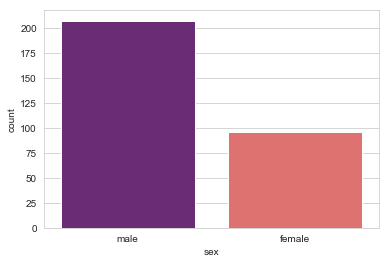

In [12]:
sns.countplot(x=heart['sex'],palette='magma')

In [13]:
def chest_func(num):
    if num == 1:
        return 'typical angina'
    elif num == 2:
        return 'atypical angina'
    elif num == 3:
        return 'non-anginal pain'
    else:
        return 'asymptomatic'

In [14]:
heart['chest_pain_type'] = heart['chest_pain_type'].apply(lambda x: chest_func(x))

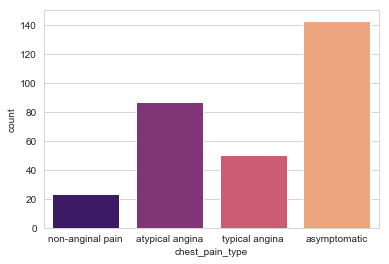

In [15]:
sns.countplot(x=heart['chest_pain_type'],palette='magma')

In [16]:
#fbs: (fasting blood sugar >120mg/dl) >120mg/dl = 1, <= 120mg/dl=0
def fbs_func(num):
    if num == 0:
        return '<=120mg/dl'
    else:
        return '>120mg/dl'

In [17]:
heart['fasting_blood_sugar'] = heart['fasting_blood_sugar'].apply(lambda x: fbs_func(x))

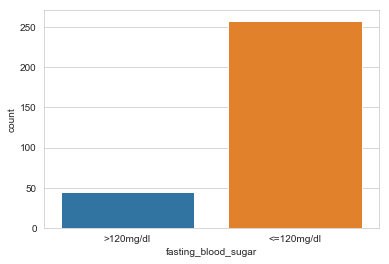

In [18]:
sns.countplot(x=heart['fasting_blood_sugar'])

In [19]:
heart['rest_ecg'].describe()

count    303.000000
mean       0.528053
std        0.525860
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: rest_ecg, dtype: float64

In [20]:
# restingecg: 0=normal, ST-T wave abnormality=1, definite left ventricular hypertrophy=2
def rest_func(num):
    if num == 0:
        return 'normal'
    elif num == 1:
        return 'ST-T wave abnormality'
    elif num == 2:
        return 'definite left ventricular hypertrophy'

In [21]:
heart['rest_ecg'] = heart['rest_ecg'].apply(lambda x: rest_func(x))

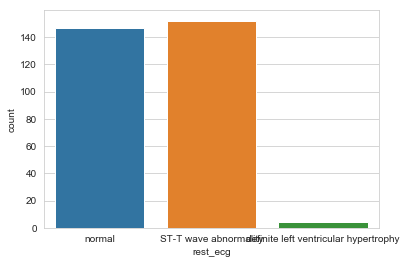

In [22]:
sns.countplot(heart['rest_ecg'])

In [23]:
def exang_func(num):
    if num == 1:
        return 'yes'
    else:
        return 'no'

In [24]:
heart['exercise_induced_angina'] = heart['exercise_induced_angina'].apply(lambda x: exang_func(x))

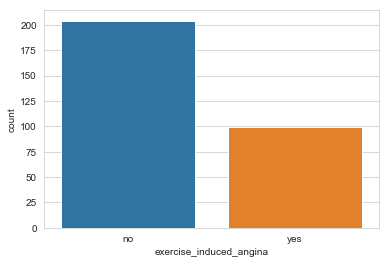

In [25]:
sns.countplot(heart['exercise_induced_angina'] )

In [27]:
#slipe of peak exercise ST segment: upsloping=1, flat=2, downsloping=3
def st_func(num):
    if num == 1:
        return 'upsloping'
    elif num == 2:
        return 'flat'
    else:
        return 'downsloping'

In [28]:
heart['st_slope'] = heart['st_slope'].apply(lambda x: st_func(x))

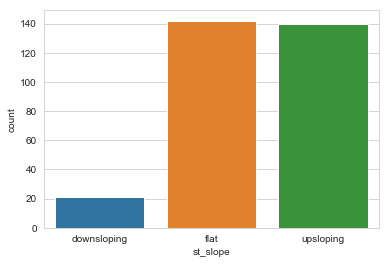

In [29]:
sns.countplot(heart['st_slope'])

In [30]:
def thal_func(num):
    if num == 0:
        return 'normal'
    elif num == 1:
        return 'normal'
    elif num == 2:
        return 'fixed defect'
    elif num == 3:
        return 'reversible'

In [31]:
heart['thalassemia'] = heart['thalassemia'].apply(lambda x: thal_func(x))

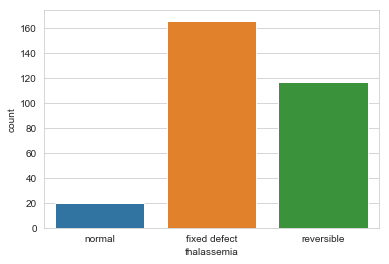

In [32]:
sns.countplot(heart['thalassemia'])

In [33]:
heart.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,>120mg/dl,normal,150,no,2.3,downsloping,0,normal,1
1,37,male,atypical angina,130,250,<=120mg/dl,ST-T wave abnormality,187,no,3.5,downsloping,0,fixed defect,1
2,41,female,typical angina,130,204,<=120mg/dl,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,<=120mg/dl,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,asymptomatic,120,354,<=120mg/dl,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


C:\Users\shahj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\shahj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


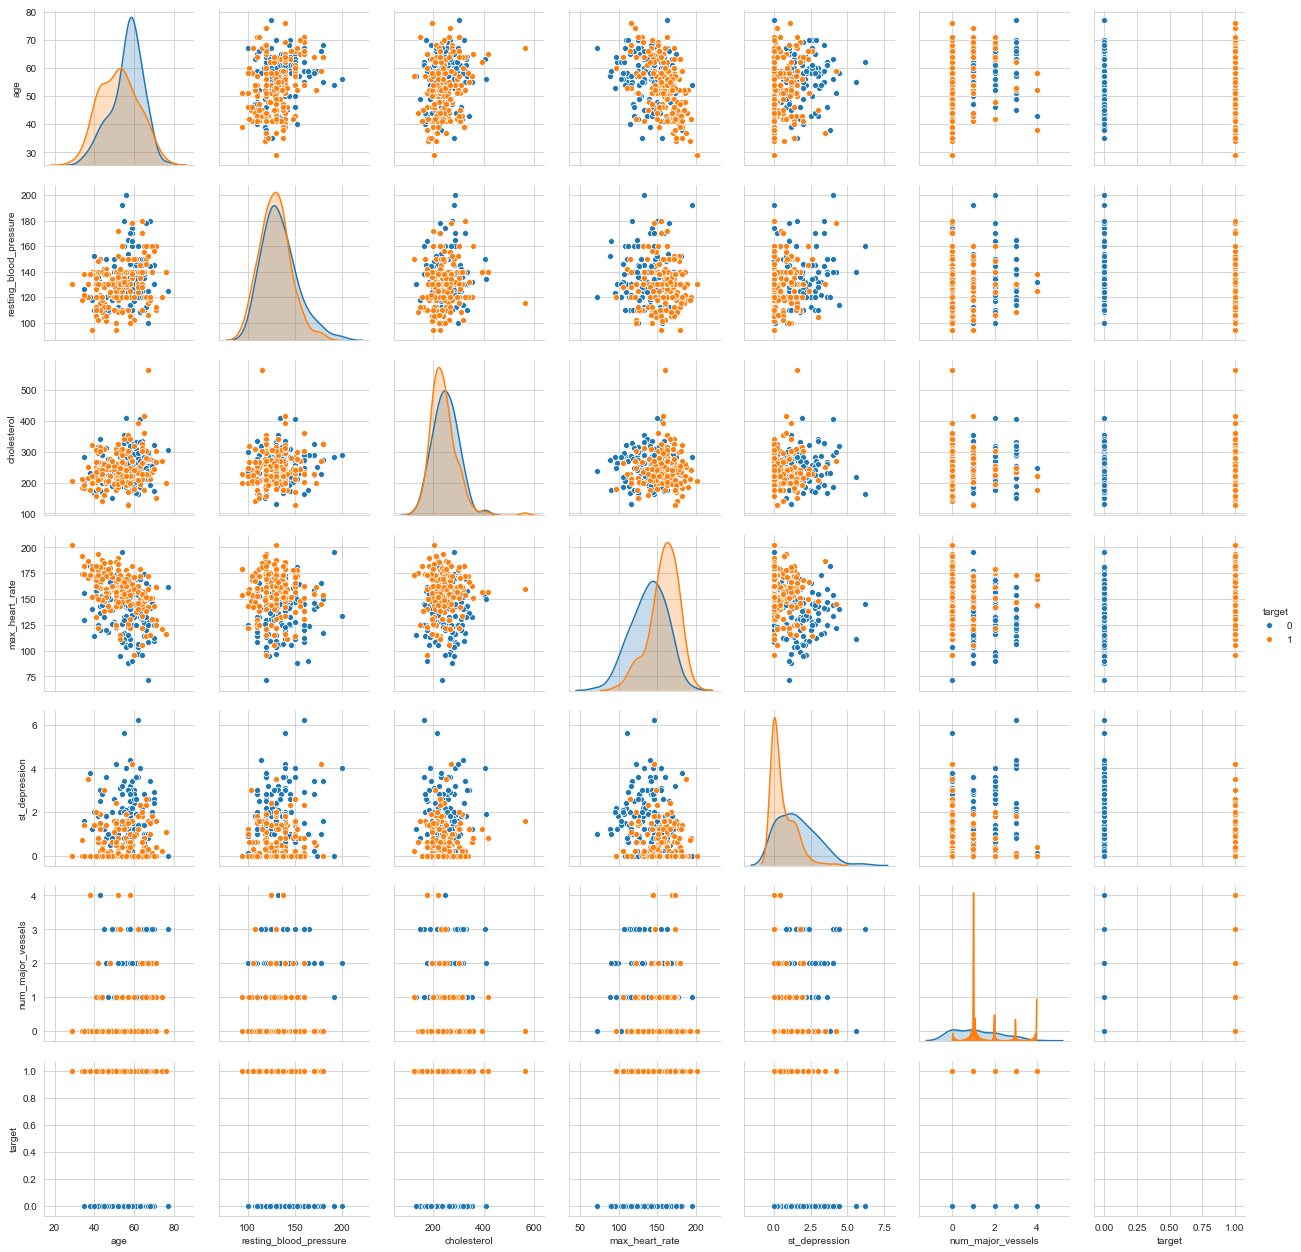

In [34]:
sns.pairplot(heart,hue='target')

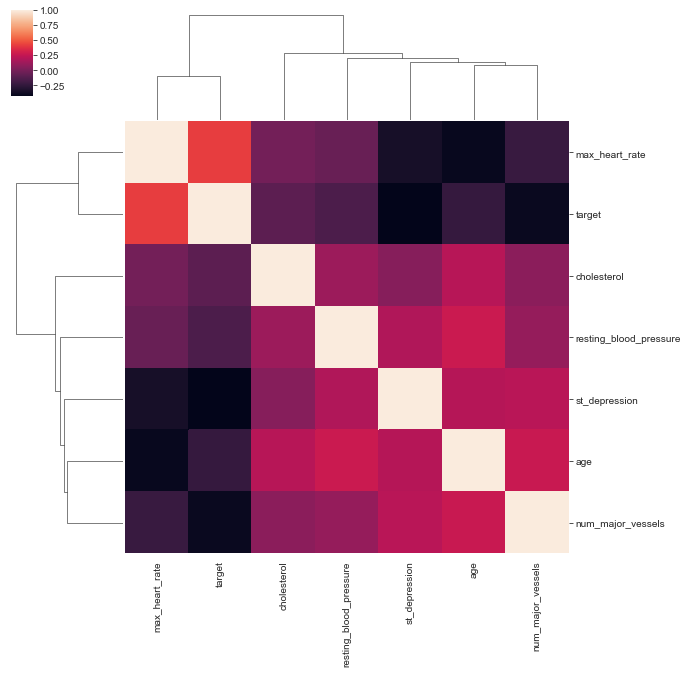

In [37]:
sns.clustermap(heart.corr())

In [38]:
heart = pd.get_dummies(heart, drop_first=True)

In [39]:
heart.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_>120mg/dl,rest_ecg_definite left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversible
0,63,145,233,150,2.3,0,1,1,0,1,0,1,0,1,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,0,0,0,0,0,0,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,0,0,1,0,1,0,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,0,0,0,0,1,0,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,0,0,0,1,1,0,0,0


In [40]:
heart.columns

Index(['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate',
       'st_depression', 'num_major_vessels', 'target', 'sex_male',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'fasting_blood_sugar_>120mg/dl',
       'rest_ecg_definite left ventricular hypertrophy', 'rest_ecg_normal',
       'exercise_induced_angina_yes', 'st_slope_flat', 'st_slope_upsloping',
       'thalassemia_normal', 'thalassemia_reversible'],
      dtype='object')

In [42]:
keys = list(heart.columns)

In [43]:
len(keys)

19

In [44]:
vals = []
count = 0
for i in range(0,19):
    vals.append('cols'+str(count))
    count += 1

In [45]:
len(vals)

19

In [52]:
vals[6] ='target'
vals[18]='cols18'

In [53]:
vals[18] 

'cols18'

In [54]:
colNameDict = dict(zip(keys, vals))

In [55]:
colNameDict

{'age': 'cols0',
 'resting_blood_pressure': 'cols1',
 'cholesterol': 'cols2',
 'max_heart_rate': 'cols3',
 'st_depression': 'cols4',
 'num_major_vessels': 'cols5',
 'target': 'target',
 'sex_male': 'cols7',
 'chest_pain_type_atypical angina': 'cols8',
 'chest_pain_type_non-anginal pain': 'cols9',
 'chest_pain_type_typical angina': 'cols10',
 'fasting_blood_sugar_>120mg/dl': 'cols11',
 'rest_ecg_definite left ventricular hypertrophy': 'cols12',
 'rest_ecg_normal': 'cols13',
 'exercise_induced_angina_yes': 'cols14',
 'st_slope_flat': 'cols15',
 'st_slope_upsloping': 'cols16',
 'thalassemia_normal': 'cols17',
 'thalassemia_reversible': 'cols18'}

In [56]:
heart.rename(columns=colNameDict , inplace=True)

In [57]:
heart.head()

,cols0,cols1,cols2,cols3,cols4,cols5,target,cols7,cols8,cols9,cols10,cols11,cols12,cols13,cols14,cols15,cols16,cols17,cols18
0,63,145,233,150,2.3,0,1,1,0,1,0,1,0,1,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,0,0,0,0,0,0,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,0,0,1,0,1,0,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,0,0,0,0,1,0,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,0,0,0,1,1,0,0,0


In [58]:
#Scale the Data First
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler() #The scaler helps standardize the feature columns of the dataset

In [60]:
scaler.fit(heart.drop('target',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [62]:
scaled_features = scaler.transform(heart.drop('target',axis=1)) #Performs the
#standardization by centering and scaling

In [63]:
scaled_features

array([[ 0.9521966 ,  0.76395577, -0.25633371, ..., -0.92676626,
         3.76164857, -0.79311554],
       [-1.91531289, -0.09273778,  0.07219949, ..., -0.92676626,
        -0.26584089, -0.79311554],
       [-1.47415758, -0.09273778, -0.81677269, ..., -0.92676626,
        -0.26584089, -0.79311554],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ...,  1.07902072,
        -0.26584089,  1.26085034],
       [ 0.29046364, -0.09273778, -2.2275329 , ...,  1.07902072,
        -0.26584089,  1.26085034],
       [ 0.29046364, -0.09273778, -0.19835726, ...,  1.07902072,
        -0.26584089, -0.79311554]])

In [64]:
heart.drop('target', axis=1).columns

Index(['cols0', 'cols1', 'cols2', 'cols3', 'cols4', 'cols5', 'cols7', 'cols8',
       'cols9', 'cols10', 'cols11', 'cols12', 'cols13', 'cols14', 'cols15',
       'cols16', 'cols17', 'cols18'],
      dtype='object')

In [65]:
heart_feat = pd.DataFrame(scaled_features, columns=['cols0', 'cols1', 'cols2', 'cols3', 'cols4', 'cols5', 'cols7', 'cols8',
       'cols9', 'cols10', 'cols11', 'cols12', 'cols13', 'cols14', 'cols15',
       'cols16', 'cols17', 'cols18'])

In [66]:
heart_feat.head()

,cols0,cols1,cols2,cols3,cols4,cols5,cols7,cols8,cols9,cols10,cols11,cols12,cols13,cols14,cols15,cols16,cols17,cols18
0,0.952197,0.763956,-0.256334,0.015443,1.087338,-0.714429,0.681005,-0.634648,3.489114,-0.444554,2.394438,-0.115663,1.030158,-0.696631,-0.939142,-0.926766,3.761649,-0.793116
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,-0.714429,0.681005,1.575677,-0.286606,-0.444554,-0.417635,-0.115663,-0.970725,-0.696631,-0.939142,-0.926766,-0.265841,-0.793116
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,-0.714429,-1.468418,-0.634648,-0.286606,2.249444,-0.417635,-0.115663,1.030158,-0.696631,1.064802,-0.926766,-0.265841,-0.793116
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,-0.714429,0.681005,-0.634648,-0.286606,2.249444,-0.417635,-0.115663,-0.970725,-0.696631,1.064802,-0.926766,-0.265841,-0.793116
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,-0.714429,-1.468418,-0.634648,-0.286606,-0.444554,-0.417635,-0.115663,-0.970725,1.435481,1.064802,-0.926766,-0.265841,-0.793116


In [67]:
#Try the Train Test Split again
X = heart_feat
y =  heart['target']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
import tensorflow as tf

In [72]:
#Key line of code
feat_cols = []

for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [73]:
feat_cols

[_NumericColumn(key='cols0', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols1', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols4', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols5', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols7', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols8', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols9', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols10', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),

In [74]:
#Creating the DNN Classifier object
classifier = tf.estimator.DNNClassifier(hidden_units= [10,20,20,10],n_classes=2, feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\shahj\\AppData\\Local\\Temp\\tmp34ynlnef', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023BC7B9B7F0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [75]:
#creating a tf.estimator.pandas_input_fn that takes in  X_train, y_train, batch_size with shuffle=True
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=20,num_epochs=5,shuffle=True)

In [76]:
classifier.train(input_fn=input_func, steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\shahj\AppData\Local\Temp\tmp34ynlnef\model.ckpt.
INFO:tensorflow:loss = 13.524506, step = 1
INFO:tensorflow:Saving checkpoints for 51 into C:\Users\shahj\AppData\Local\Temp\tmp34ynlnef\model.ckpt.
INFO:tensorflow:Loss for final step: 3.5912466.


In [77]:
 ##Create a prediction input function
pred_input_func =  tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,
                                                num_epochs=1,shuffle=False)

In [78]:
predictions = list(classifier.predict(input_fn=pred_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\shahj\AppData\Local\Temp\tmp34ynlnef\model.ckpt-51
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [79]:
final_pred = []

for pred in predictions:
    final_pred.append(pred['class_ids'][0])

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
print(confusion_matrix(y_test,final_pred))
print('\n')
print(classification_report(y_test,final_pred))

[[37  5]
 [12 46]]


              precision    recall  f1-score   support

           0       0.76      0.88      0.81        42
           1       0.90      0.79      0.84        58

    accuracy                           0.83       100
   macro avg       0.83      0.84      0.83       100
weighted avg       0.84      0.83      0.83       100



I am not satisfied with this one, it was a shortcut I had to devise to get around that categorical variable error that occured the first time I tried this. I do believe that if my preprocessing workflow was better I could improve precision far more than what I have here. However, the DNN Classifier is much better at correctly classifying true cases of heart attacks, than either the Random Forest or the K-Nearest Neighbor.